<a href="https://colab.research.google.com/github/semthedev/OpenCV-projects/blob/main/lab_06_analysis_clothing_recognition_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow. keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow. keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
classes = ['футболка',
'брюки',
'свитер',
'платье',
'пальто',
'туфли',
'рубашка',
'кроссовки',
'сумка',
'ботинки']

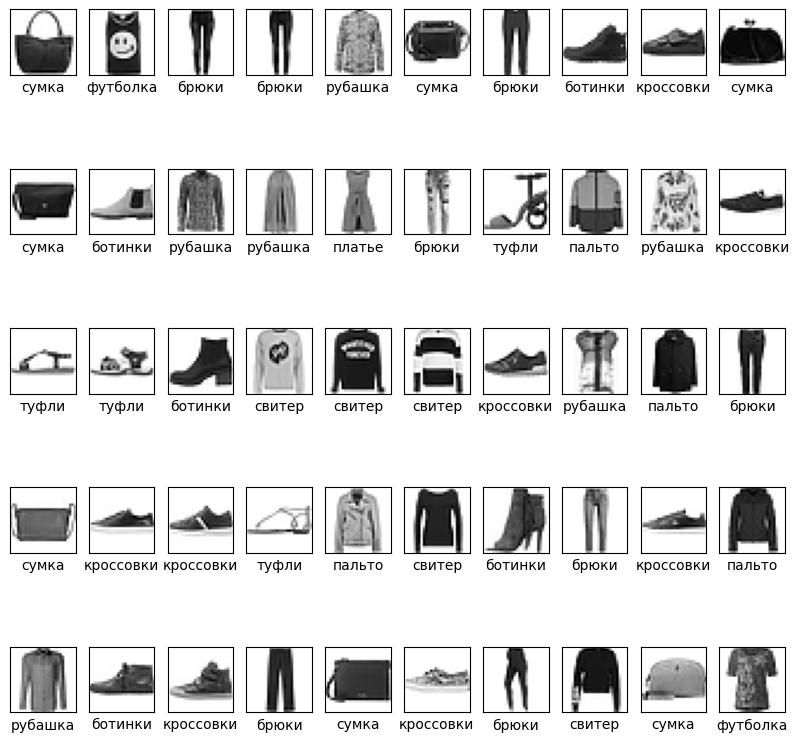

In [5]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10, i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train [i]])

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test. reshape(10000, 784)

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

In [8]:
n = 0

In [9]:
print(y_train[n])

9


In [10]:
y_train = utils.to_categorical(y_train, 10)

y_test = utils.to_categorical(y_test, 10)

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
# Creating a sequential model
model = Sequential()
# Fully connected input layer, 800 neurons, 784 inputs to each neuron
model.add(Dense(800, input_dim=784, activation="relu"))

model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5509 - loss: 1.5213 - val_accuracy: 0.7523 - val_loss: 0.8318
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7606 - loss: 0.7917 - val_accuracy: 0.7786 - val_loss: 0.6931
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7854 - loss: 0.6856 - val_accuracy: 0.8010 - val_loss: 0.6285
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8027 - loss: 0.6235 - val_accuracy: 0.8090 - val_loss: 0.5910
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8145 - loss: 0.5836 - val_accuracy: 0.8142 - val_loss: 0.5643
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8193 - loss: 0.5595 - val_accuracy: 0.8183 - val_loss: 0.5456
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8251 - loss: 0.5348 - val_accuracy: 0.8242 - val_loss: 0.5284
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8291 - loss: 0.5207 - 

In [16]:
model.save('fashion_mnist_dense.keras')
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3744
Доля верных ответов на тестовых данных, в процентах: 86.43


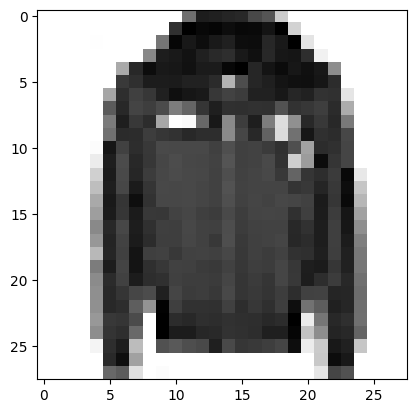

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Номер класса: 4
Название класса: пальто
Номер класса (истинный): 4
Название класса (истинный): пальто


In [17]:
n_rec = 4789
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

label = np.argmax(y_test[n_rec])
print("Номер класса (истинный):", label)
print("Название класса (истинный):", classes[label])

In [18]:
files.upload()

Saving 1200px-Iraqi_Air_Force_Antonov_An-32B.jpg to 1200px-Iraqi_Air_Force_Antonov_An-32B.jpg


{'1200px-Iraqi_Air_Force_Antonov_An-32B.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xfe\x00XFile source: http://commons.wikimedia.org/wiki/File:Iraqi_Air_Force_Antonov_An-32B.jpg\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x03 \x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x06\x02\x03\x04\x07\x08\xff\xc4\x00J\x10\x00\x02\x01\x03\x02\x03\x05\x04\x07\x06\x04\x05\x02\x06\x02\x03\x00\x01\x02\x03\x04\x11\x05!\x121A\x06\x13Qaq"2\x81\x91\x07\x14BR\xa1\xb1\xc1\x15#br\xd1\xf03\x82\x92\xe1\x16$CS\xf1\x08cDTUs\xa2\xc2%&4\x83\xb2\xff\xc4\x00\x1b\x01\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\

In [19]:
!ls

1200px-Iraqi_Air_Force_Antonov_An-32B.jpg  fashion_mnist_dense.keras  sample_data


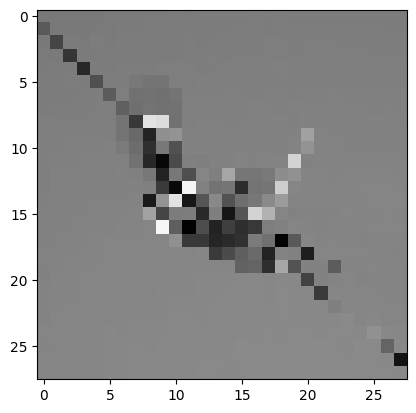

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Номер класса (для загруженной картинки): 8
Название класса (для загруженной картинки): сумка


In [20]:
img_path = '1200px-Iraqi_Air_Force_Antonov_An-32B.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()

x = image.img_to_array(img)
x = x.reshape(1, 784)
x = 255 - x
x /= 255

prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Номер класса (для загруженной картинки):", prediction)
print("Название класса (для загруженной картинки):", classes[prediction])